<a id='section-0'></a>
<h1 style="color:#ff1a75;">Human Development Index Historical data</h1>

<h3 style="color:#ff66ff;">Historical data for HDI of countries</h3>

---

<h2 style="color:#33ccff;">Table of Contents:</h2>
<ol>
    <li><a href="#section-1" style="color:#0000ff;">Importing Necessary Libraries</a></li>
    <li><a href="#section-2" style="color:#0000ff;">Data Loading and Pre-Processing</a></li>
    <ol>
        <li><a href="#section-2.1" style="color:#0000ff;">Finding and Handling Missing Data</a></li>
    </ol>
    <li><a href="#section-3" style="color:#0000ff;">Exploratory Data Analysis</a></li>
    <ol>
        <li><a href="#section-3.1" style="color:#0000ff;">Top 10 Countries</a></li>
        <li><a href="#section-3.2" style="color:#0000ff;">Comparing Growth Between 1990 and 2019</a></li>
        <li><a href="#section-3.3" style="color:#0000ff;">Growth Between 1990 - 2019</a></li>
        <li><a href="#section-3.4" style="color:#0000ff;">Growth Between 2000 - 2019</a></li>
        <li><a href="#section-3.5" style="color:#0000ff;">Growth Between 2010 - 2019</a></li>
    </ol>
    <li><a href="#section-99" style="color:#0000ff;">Thank You</a></li>
</ol>

---

<a id='section-1'></a>
<h1 style="color:#ff1a75;">Importing Necessary Libraries</h1>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px

import os

---
<a id='section-2'></a>
<h1 style="color:#ff1a75;">Data Loading and Pre-Processing</h1>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---

In [13]:
df = pd.read_csv('../input/human-development-index-historical-data/HDI.csv')

In [14]:
df.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


<p style="color:#000099;font-size:16px;">All the columns between 1990 to 2019 have numeric values ranging from 0 to 1.</p>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    object 
 2   1990      189 non-null    object 
 3   1991      189 non-null    object 
 4   1992      189 non-null    object 
 5   1993      189 non-null    object 
 6   1994      189 non-null    object 
 7   1995      189 non-null    object 
 8   1996      189 non-null    object 
 9   1997      189 non-null    object 
 10  1998      189 non-null    object 
 11  1999      189 non-null    object 
 12  2000      189 non-null    object 
 13  2001      189 non-null    object 
 14  2002      189 non-null    object 
 15  2003      189 non-null    object 
 16  2004      189 non-null    object 
 17  2005      189 non-null    object 
 18  2006      189 non-null    object 
 19  2007      189 non-null    object 
 20  2008      189 non-null    object

<p style="color:#000099;font-size:16px;">Some things to note here:<br>All the cells are filled yet almost all the columns between 1990 to 2016 have numeric data yet the data type is object.<br>So we will have to check that.</p>

In [16]:
columns = df.columns
columns = columns.drop(['HDI Rank', 'Country','2017', '2018', '2019'])

In [17]:
for col in columns:
    print(col," : ",df[col].min(),df[col].max())

1990  :  .. 0.871
1991  :  .. 0.871
1992  :  .. 0.873
1993  :  .. 0.877
1994  :  .. 0.883
1995  :  .. 0.888
1996  :  .. 0.89
1997  :  .. 0.893
1998  :  .. 0.904
1999  :  .. 0.909
2000  :  .. 0.915
2001  :  .. 0.914
2002  :  .. 0.917
2003  :  .. 0.923
2004  :  .. 0.932
2005  :  .. 0.931
2006  :  .. 0.934
2007  :  .. 0.936
2008  :  .. 0.937
2009  :  .. 0.937
2010  :  .. 0.941
2011  :  .. 0.942
2012  :  .. 0.944
2013  :  .. 0.946
2014  :  .. 0.944
2015  :  .. 0.947
2016  :  .. 0.95


<p style="color:#000099;font-size:16px;">So we need to handle these <b style="color:#ff0000;">".."</b> values for further processing!!!</p>

<a id='section-2.1'></a>
<h3 style="color:#ff1a75;">Finding and Handling Missing Data</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

<p style="color:#000099;font-size:16px;">My approach:<br>
    1. Replacing <b>..</b> with Null first.<br>
    2. Then finding out the percentage of null values.<br>
    3. If the percentage of null values is too less, drop it.<br>
    4. Else fill the values for further processing!!!</p>

In [18]:
df = df.replace({"..":np.nan})

In [19]:
df.isnull().sum()

HDI Rank     0
Country      0
1990        45
1991        45
1992        45
1993        45
1994        45
1995        41
1996        41
1997        41
1998        41
1999        38
2000        15
2001        15
2002        14
2003        13
2004        11
2005         4
2006         3
2007         3
2008         3
2009         3
2010         1
2011         1
2012         1
2013         1
2014         1
2015         1
2016         1
2017         0
2018         0
2019         0
dtype: int64

In [20]:
null_count = df['1990'].isnull().sum()
total = len(df)
percent_null = (null_count / total) * 100

print("Total Percentage Null Data : {:.2f} %".format(percent_null))

Total Percentage Null Data : 23.81 %


<p style="color:#000099;font-size:16px;">We clearly can't drop <b>23%</b> of data.
So we will have to fill this data.</p>

In [21]:
df[df['1990'].isnull()]

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,36,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581
5,78,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.763,0.755,0.759,0.76,0.76,0.762,0.765,0.768,0.772,0.778
10,88,Azerbaijan,NaN,NaN,NaN,NaN,NaN,0.604,0.605,0.61,...,0.726,0.727,0.73,0.735,0.74,0.744,0.751,0.754,0.754,0.756
11,58,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.805,0.805,0.807,0.806,0.805,0.808,0.81,0.812,0.812,0.814
15,53,Belarus,NaN,NaN,NaN,NaN,NaN,0.66,0.664,0.67,...,0.795,0.801,0.806,0.811,0.814,0.814,0.815,0.819,0.823,0.823
19,129,Bhutan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.574,0.585,0.597,0.61,0.618,0.628,0.637,0.646,0.649,0.654
21,73,Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.721,0.729,0.748,0.755,0.758,0.761,0.772,0.774,0.777,0.780
26,182,Burkina Faso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.384,0.394,0.403,0.41,0.413,0.422,0.428,0.439,0.443,0.452
28,126,Cabo Verde,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.632,0.639,0.644,0.647,0.654,0.656,0.657,0.660,0.663,0.665


In [32]:
for col in columns:
    df[col] = pd.to_numeric(df[col])
    df[col] = df[col].fillna(df[col].mean())

<p style="color:#000099;font-size:16px;">Filled individual column Null values with the <b>Mean</b> of that column</p>

In [33]:
df.isnull().sum()

HDI Rank    0
Country     0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
dtype: int64

In [34]:
df.describe()

,HDI Rank,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.783069,0.599653,0.601854,0.604187,0.608229,0.612347,0.615669,0.621007,0.626182,0.631446,...,0.687197,0.692713,0.697676,0.702644,0.706777,0.710511,0.713367,0.716783,0.719423,0.722423
std,54.754486,0.144384,0.144851,0.145492,0.146462,0.148029,0.149182,0.149355,0.149455,0.149789,...,0.156158,0.154685,0.153394,0.152343,0.151631,0.151464,0.151398,0.150598,0.150379,0.149791
min,1.000000,0.220000,0.220000,0.202000,0.197000,0.192000,0.231000,0.244000,0.248000,0.255000,...,0.331000,0.338000,0.350000,0.357000,0.365000,0.372000,0.378000,0.386000,0.391000,0.394000
25%,48.000000,0.548000,0.542000,0.552000,0.548000,0.550000,0.549000,0.560000,0.564000,0.571000,...,0.552000,0.565000,0.573000,0.579000,0.579000,0.587000,0.588000,0.595000,0.599000,0.602000
50%,95.000000,0.599653,0.601854,0.604187,0.608229,0.612347,0.615669,0.621007,0.626182,0.631446,...,0.718000,0.721000,0.728000,0.729000,0.733000,0.737000,0.738000,0.736000,0.738000,0.740000
75%,142.000000,0.708000,0.706000,0.706000,0.704000,0.704000,0.710000,0.718000,0.727000,0.736000,...,0.803000,0.806000,0.808000,0.815000,0.820000,0.820000,0.822000,0.822000,0.826000,0.829000
max,189.000000,0.871000,0.871000,0.873000,0.877000,0.883000,0.888000,0.890000,0.893000,0.904000,...,0.941000,0.942000,0.944000,0.946000,0.944000,0.947000,0.950000,0.954000,0.956000,0.957000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    object 
 2   1990      189 non-null    float64
 3   1991      189 non-null    float64
 4   1992      189 non-null    float64
 5   1993      189 non-null    float64
 6   1994      189 non-null    float64
 7   1995      189 non-null    float64
 8   1996      189 non-null    float64
 9   1997      189 non-null    float64
 10  1998      189 non-null    float64
 11  1999      189 non-null    float64
 12  2000      189 non-null    float64
 13  2001      189 non-null    float64
 14  2002      189 non-null    float64
 15  2003      189 non-null    float64
 16  2004      189 non-null    float64
 17  2005      189 non-null    float64
 18  2006      189 non-null    float64
 19  2007      189 non-null    float64
 20  2008      189 non-null    float6

<p style="color:#000099;font-size:16px;">All the null values are filled and all the columns are now of numeric data type.<br>All the data pre-processing is done!!!</p>

---
<a id='section-3'></a>
<h1 style="color:#ff1a75;">Exploratory Data Analysis</h1>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---

In [42]:
df.head(3)

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,1990-2019,2000-2019,2010-2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.496,0.500,0.500,0.502,0.506,0.509,0.511,0.209,0.161,0.039
1,69,Albania,0.650,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.782,0.787,0.788,0.788,0.790,0.792,0.795,0.145,0.124,0.050
2,91,Algeria,0.572,0.576,0.582,0.586,0.590,0.595,0.602,0.611,...,0.729,0.736,0.740,0.743,0.745,0.746,0.748,0.176,0.111,0.027


In [46]:
top10 = df.sort_values(by='HDI Rank')
top10 = top10[['HDI Rank','Country']][:10]

<a id='section-3.1'></a>
<h3 style="color:#ff1a75;">Top 10 Countries</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

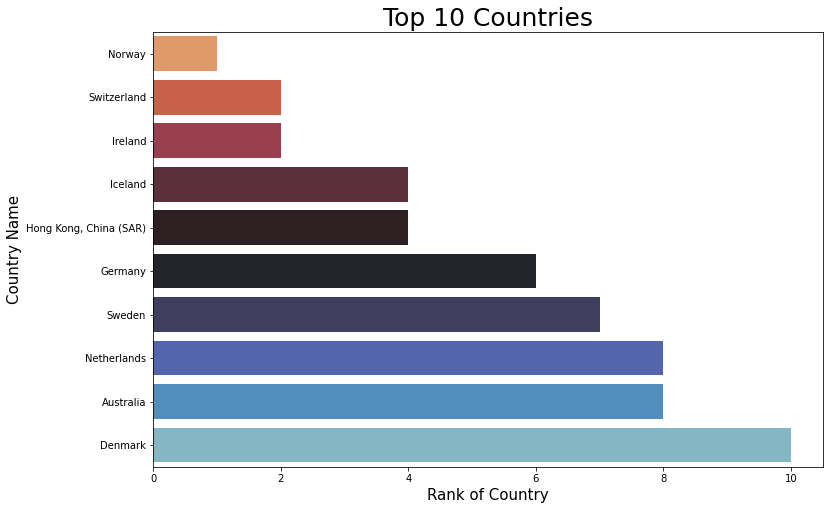

In [50]:
label_font = {'fontsize': '15', 'fontweight' : '3'}
title_font = {'fontsize': '25', 'fontweight' : '5'}
plt.figure(figsize=(12,8));
sns.barplot(x='HDI Rank',y='Country',data=top10,palette='icefire_r');
plt.xlabel('Rank of Country',fontdict = label_font);
plt.ylabel('Country Name',fontdict = label_font);
plt.title('Top 10 Countries',fontdict = title_font);

<p style="color:#000099;font-size:16px;">For plotting world maps, I have used Choropleth map of plotly.<br>
<b>For fun, try hovering over the maps!!!</b></p>

In [36]:
 def world_map(col=None,title=None):
    '''
    Function to plot a choropleth world Map.
    Arguments required:
    1. Column Name for which distribution is to be plotted.
    2. The Title of the Graph.
    '''
    fig = px.choropleth(df,
                  locations='Country',
                  locationmode='country names',
                  hover_name='Country',
                  color=col,
                  color_continuous_scale='icefire_r')

    fig.update_layout(title_text=title)
    fig.show()

<a id='section-3.2'></a>
<h3 style="color:#ff1a75;">Comparing Growth Between 1990 and 2019</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [37]:
world_map(col = '1990',title = 'Human Development Index 1990')
world_map(col = '2019',title = 'Human Development Index 2019')

<p style="color:#000099;font-size:16px;">If we hover over India on the map, we can see that India has had an improvement from <b>0.429 to 0.645</b>.<br>
We can see the difference in growth of each country.
    Let's plot a map of the change in countries between <b>1990 and 2019</b>.</p>

<a id='section-3.3'></a>
<h3 style="color:#ff1a75;">Growth Between 1990 - 2019</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [38]:
df['1990-2019'] = df['2019']-df['1990']
world_map(col = '1990-2019',title = 'Human Development Index Growth from 1990 to 2019')

<p style="color:#000099;font-size:16px;">
It's really unique to see that almost all the countries have growth in HDI index except for a few African Countries and countries surrounding it!!!<br><br>
Surprising enough, China has had the highest growth between 1990 to 2019!!!</p>

<a id='section-3.4'></a>
<h3 style="color:#ff1a75;">Growth Between 2000 - 2019</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [39]:
df['2000-2019'] = df['2019']-df['2000']
world_map(col = '2000-2019',title = 'Human Development Index Growth from 2000 to 2019')

<p style="color:#000099;font-size:16px;">
Comparing 2000 to 2019, it is really great to see that Rwanda had the highest growth!!!<br><br>
    While between 1990-2019, African continents had the lowest growth, between 2000-2019, <b>Rwanda</b> a country from the African Continent had the highest growth!!!</p>

<a id='section-3.5'></a>
<h3 style="color:#ff1a75;">Growth Between 2010 - 2019</h3>


<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

In [40]:
df['2010-2019'] = df['2019']-df['2010']
world_map(col = '2010-2019',title = 'Human Development Index Growth from 2010 to 2019')

<p style="color:#000099;font-size:16px;">
Something to notice here..<br><br>
    Venezuela had a negative growth between <b>2010 and 2019</b> because of the HyperInflation which is still a problem in <b>Venezuela</b>.</p>

---
<a id='section-99'></a>
<h1 style="color:#ff1a75;">Thank You!!!</h1>

<h3 style="color:#ff66ff;">If you liked the notebook, do upvote it!!!</h3>

<h5><a href="#section-0" style="color:#ff6600;">Back To Content Table</a></h5>

---